In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib

In [2]:
import graphviz.backend as be

In [3]:
from sklearn.datasets import *
import dtreeviz
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier()
iris = load_iris() 
x_train,y_train = iris.data,iris.target

In [5]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

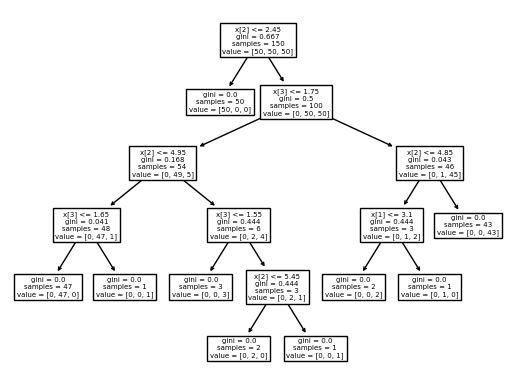

In [6]:
from sklearn.tree import plot_tree
plot_tree(clf)

### Classification

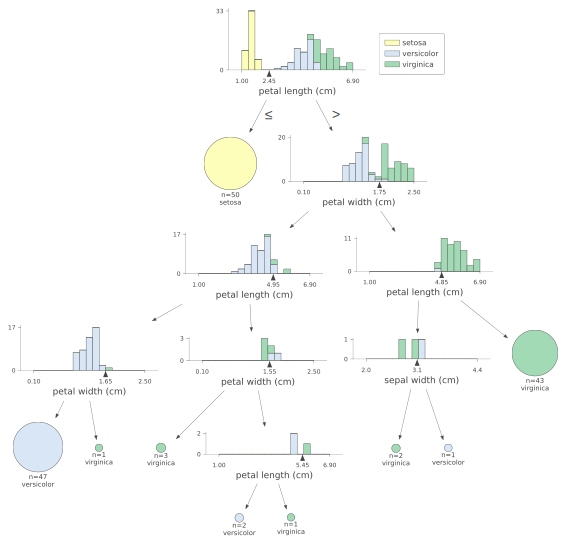

In [11]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
viz = dtreeviz.model(clf,
              x_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica'])
viz.view()

### Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor
rt = DecisionTreeRegressor()
boston = pd.read_csv('HousingData.csv')
boston.dropna(inplace=True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [18]:
x_train = boston.iloc[:,:-1]
y_train = boston.iloc[:,-1]

In [19]:
rt = DecisionTreeRegressor()
rt.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
viz = dtreeviz.model(rt,
                    x_train,
                    y_train,
                    feature_names=boston.columns,
                    target_name='MEDV'
                    )
v=viz.view()

### Horizontal Decision tree

In [24]:
v.save('regression_tree_dtreeviz.svg')

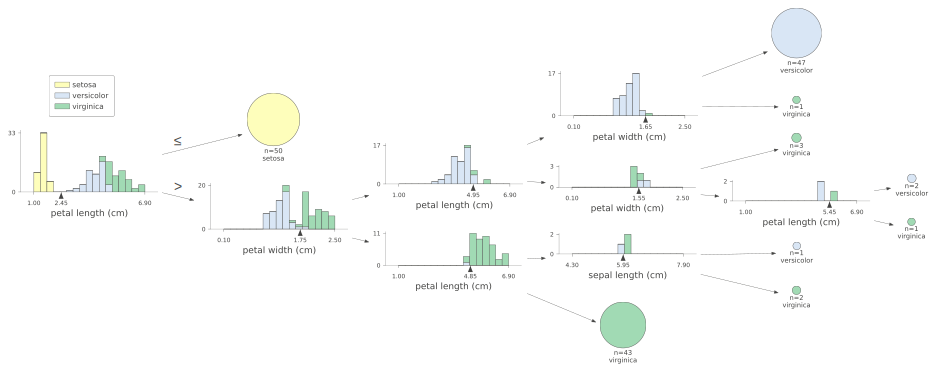

In [33]:
viz = dtreeviz.model(clf,
              x_train,
              y_train,
              feature_names=iris.feature_names,
              class_names=['setosa','versicolor','virginica'],
                )
viz.view(orientation='LR')

### Show prediction path

In [29]:
clf = DecisionTreeClassifier()
iris = load_iris()
x_train = iris.data
y_train = iris.target
clf.fit(x_train,y_train)


DecisionTreeClassifier()

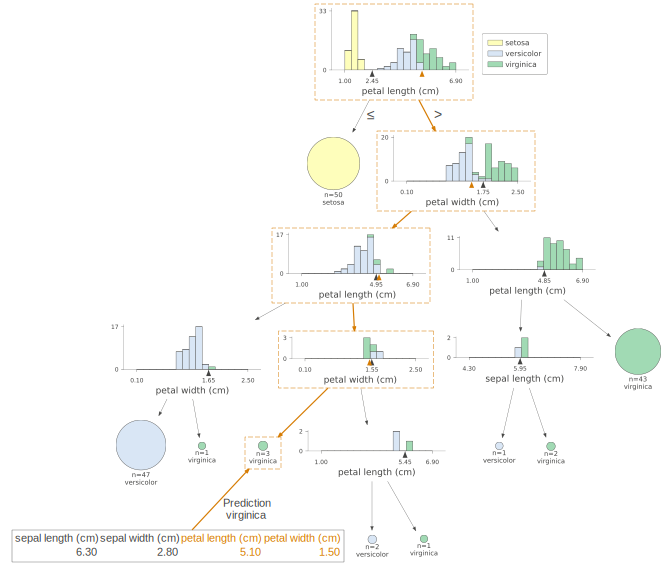

In [38]:
x = iris.data[np.random.randint(0,len(iris.data)-1)]
viz = dtreeviz.model(clf,
                    x_train,
                    y_train,
                    feature_names=iris.feature_names,
                    class_names=['setosa','versicolor','virginica'],
            )
viz.view(x=x)

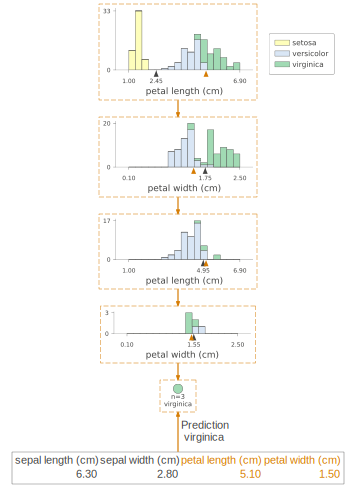

In [39]:
viz.view(x=x,show_just_path=True)

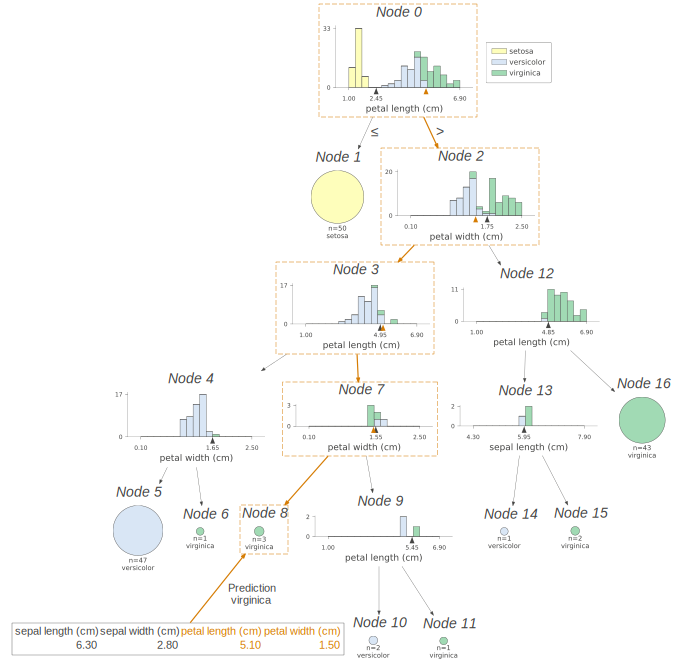

In [40]:
viz.view(x=x,show_node_labels=True)

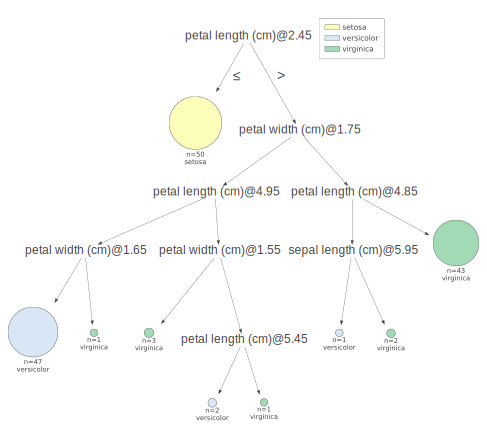

In [41]:
viz.view(fancy=False)

In [44]:
viz.explain_prediction_path(x=x)

'4.95 <= petal length (cm) \npetal width (cm) < 1.55\n'

### Univariate regression

In [45]:
df = pd.read_csv('cars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [47]:
x,y = df[['wt']],df['mpg']
dt = DecisionTreeRegressor()
dt.fit(x,y)


DecisionTreeRegressor()

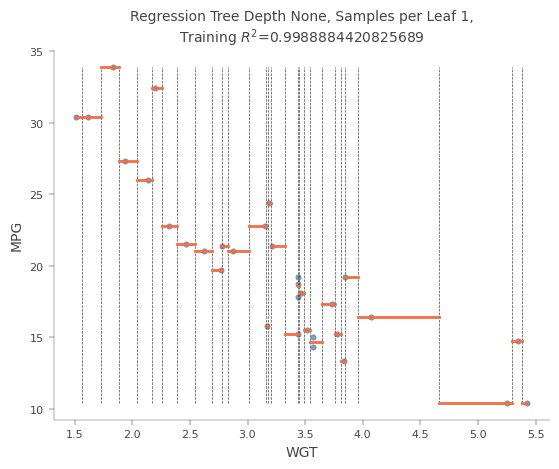

In [56]:
from dtreeviz import rtreeviz_univar
fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, x, y, 'WGT', 'MPG', ax=ax)
plt.show()

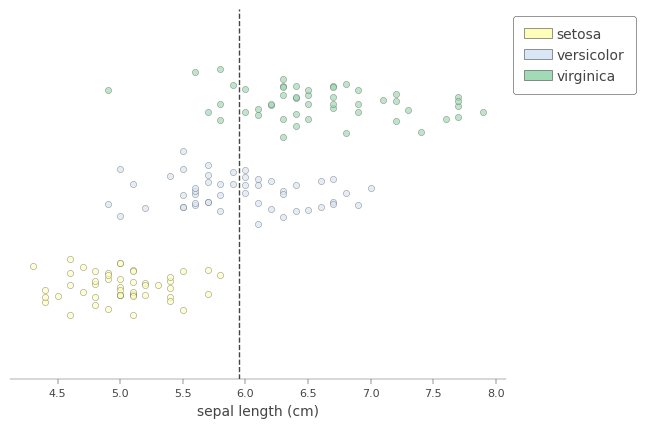

In [52]:
viz.ctree_feature_space(features=['sepal length (cm)'],show={'splits','legend'})

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

TypeError: object of type 'int' has no len()

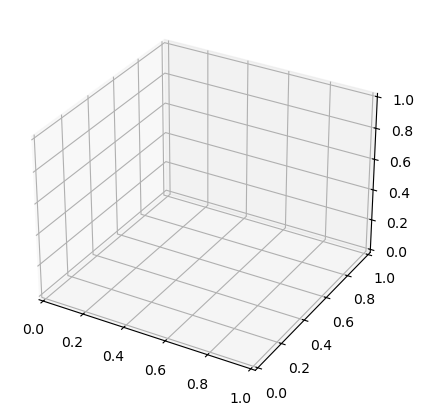

In [61]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from dtreeviz import rtreeviz_bivar_3D


X = df[['wt','hp']]
y = df['mpg']

dt = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")
dt.fit(X, y)

figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(dt,
                      X, y,
                      feature_names=['Vehicle Weight', 'Horse Power'],
                      target_name='mpg',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()